FIAP - Tecnólogo de Inteligência Artificial 1TIAR


# Challenge - Intelli Deere - 1TIAR - 2023

## Integrantes

- `RM97804` - Arthur Coutinho Santos
- `RM550210` - Camilly Alves
- `RM99221` - Guilherme Garcia Paschoalinoto
- `RM98744` - João Vitor de Andrade Martins
- `RM98262` - Murilo Krauss

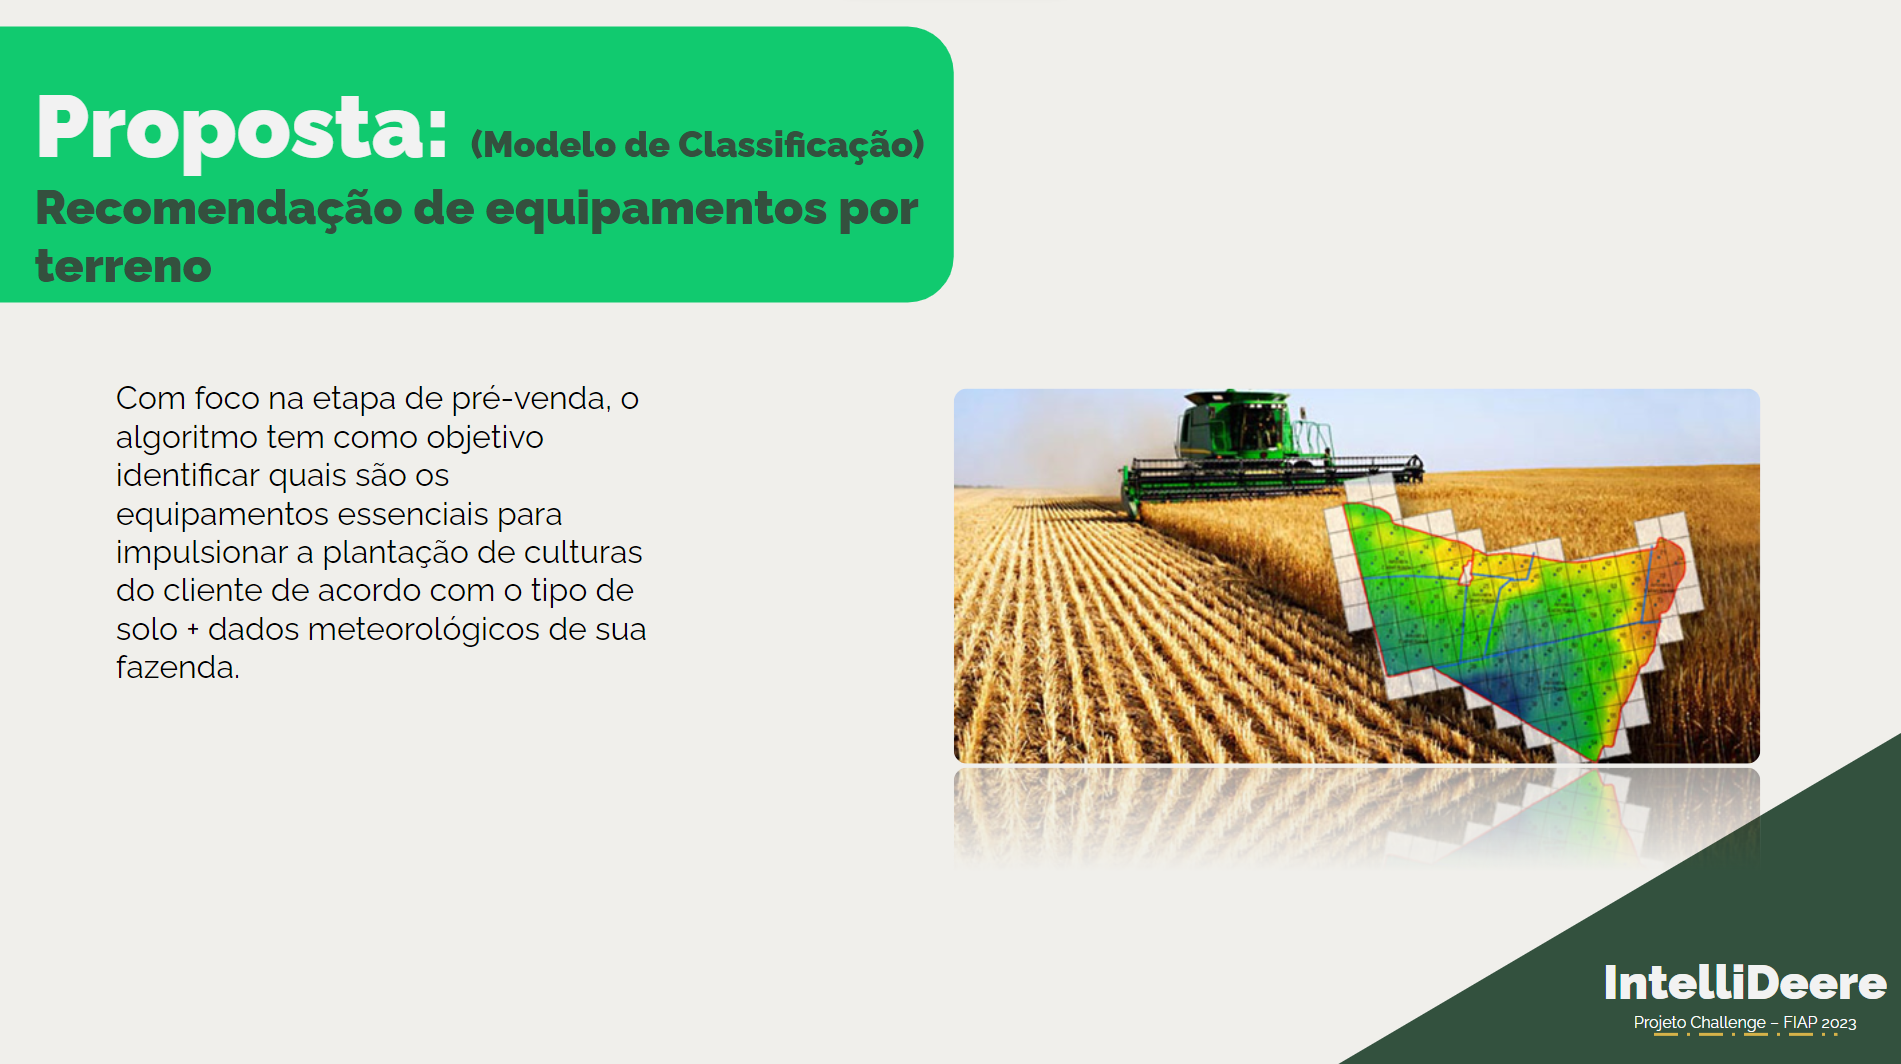

# Modelo 01 - Classificação de Equipamentos Adequados por tipo de terreno

Com foco na etapa de pré-venda, o algoritmo tem como objetivo identificar quais são os equipamentos essenciais para impulsionar a plantação de culturas do cliente de acordo com o tipo de terreno/solo de sua fazenda.

# Importa bibliotecas

In [ ]:
# Biblioteca para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np
import math

# Bibliotecas para gráficos
from matplotlib import pyplot as plt
import seaborn as sns

# Biblioteca para separação de bases em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para padronização de dados
from sklearn.preprocessing import StandardScaler

# Bibliotecas para modelos de MLP
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

# Bibliotecas para modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Biblioteca para algoritmo de clusterização
from sklearn.cluster import KMeans

# Biblioteca para visualização da árvore
from sklearn.tree import plot_tree

# Biblioteca para avaliação de métricas dos modelos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, \
                            f1_score, r2_score, precision_score, recall_score

# Inicio de análise exploratória

## Dados de dataset:
- `Latitude` : Latitude do terreno;
- `Longitude` : Longitude do terreno;
- `Estado` : Estado em que o terreno se localiza;
- `Regiao` : Região em que o terreno se localiza;
- `Municipio` : Municipio em que o terreno se localiza;
- `Mes` : Mes de coleta das informações;
- `Precipitacao Media hPa` : Precipitação média em milímetros;
- `Precipitacao Mediana hPa` : Mediana de precipitação em milímetros;
- `Umidade Media %` : Umidade média do município em %;
- `Umidade Mediana %` : Mediana de umidade do município em %;
- `Temperatura Media Kelvin` : Temperatura média do município em Kelvin;
- `Temperatura Mediana Kelvin` : Mediana de temperatura do município em Kelvin;

- `Cultura` : Cultura agrícola cultivada no terreno do município;

- `Composicao do solo - 1` : Tipo 01 de composição do terreno do município;
- `Composicao do solo - 2` : Tipo 02 de composição do terreno do município;
- `Composicao do solo - 3` : Tipo 03 de composição do terreno do município;
- `Composicao do solo - 4` : Tipo 04 de composição do terreno do município;
- `Composicao do solo - 5` : Tipo 05 de composição do terreno do município;
- `Composicao do solo - 6` : Tipo 06 de composição do terreno do município;

- `Composicao do solo (ordem) - 1` : Tipo 01 de composição (ordem) do terreno do município;
- `Composicao do solo (ordem) - 2` : Tipo 02 de composição (ordem) do terreno do município;
- `Composicao do solo (ordem) - 3` : Tipo 03 de composição (ordem) do terreno do município;
- `Composicao do solo (ordem) - 4` : Tipo 04 de composição (ordem) do terreno do município;
- `Composicao do solo (ordem) - 5` : Tipo 05 de composição (ordem) do terreno do município;
- `Composicao do solo (ordem) - 6` : Tipo 06 de composição (ordem) do terreno do município;

- `Equipamento` : Equipamento indicado para o terreno (label).

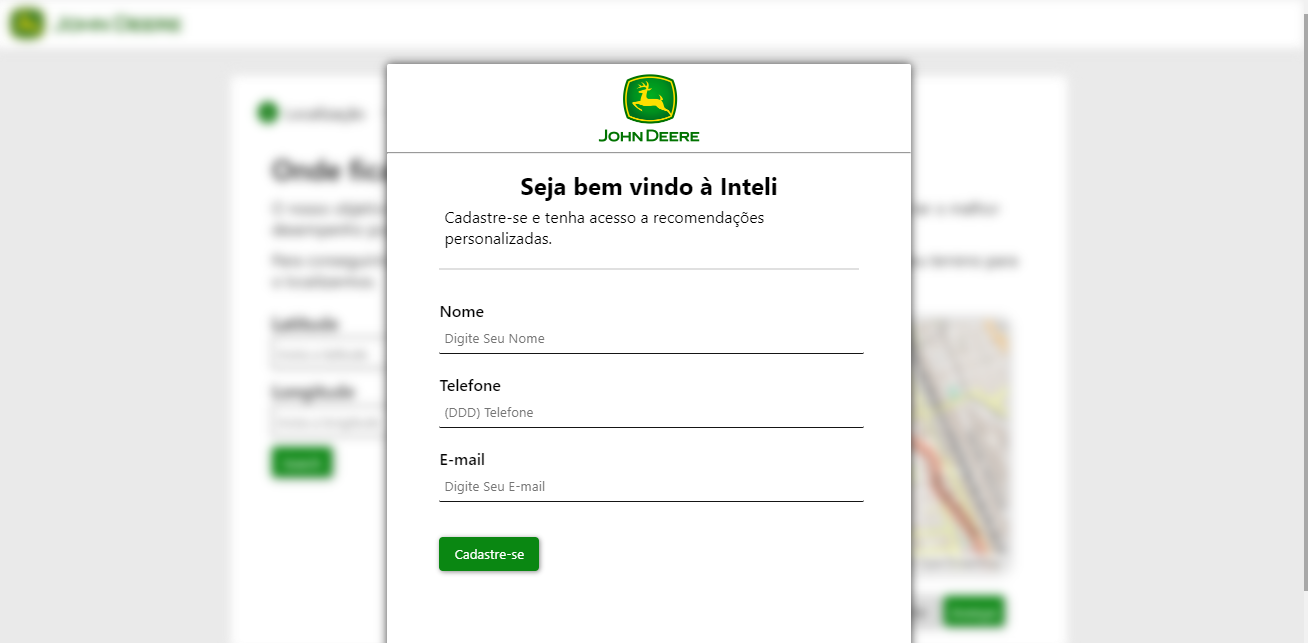

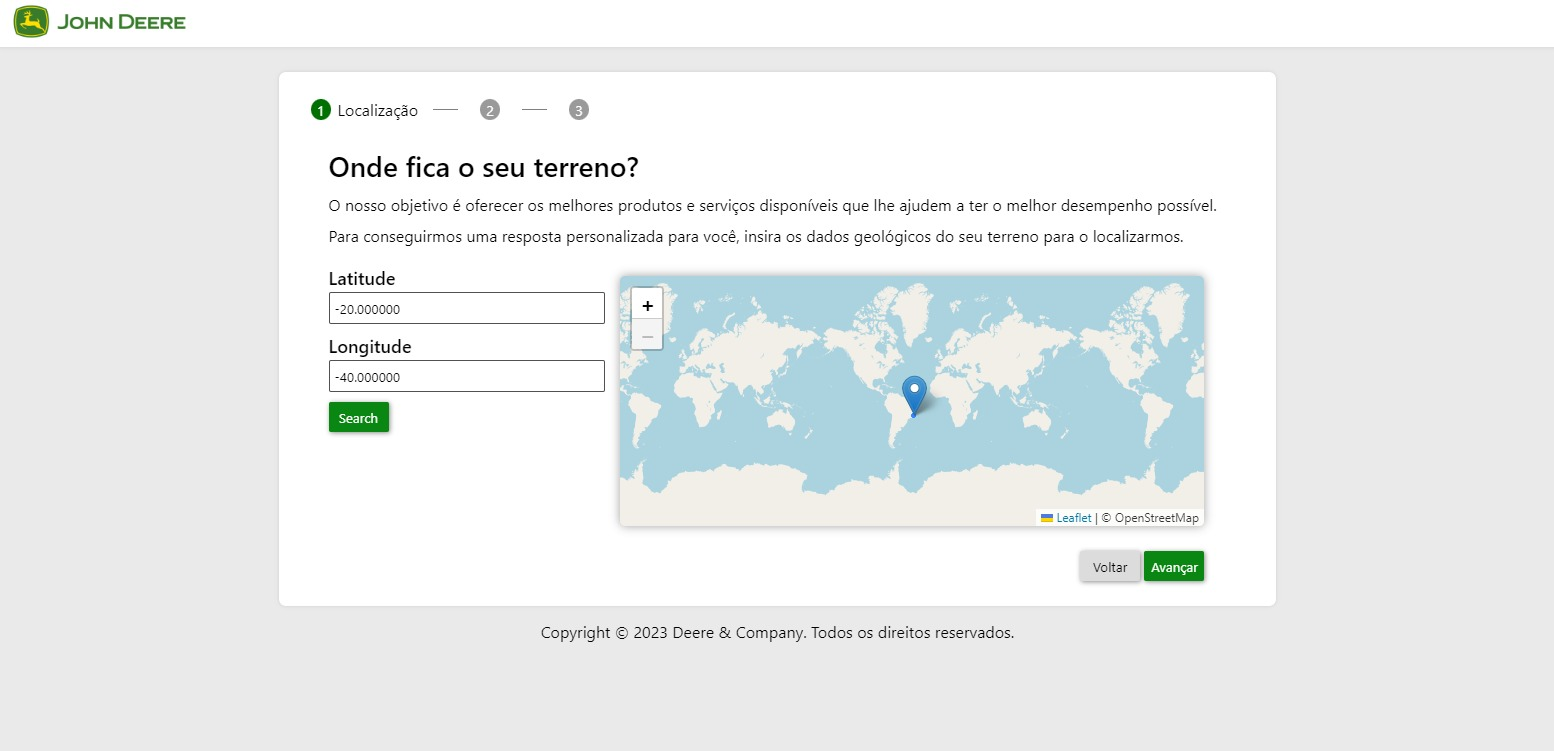

## Carrega dataframe

A partir dos dados informados pelo usuário de Longitude/Latitude do terreno e valor de produtividade, são chamadas as APIs **OpenEarth** para preencher dados meteorológicos e **Embrapa** para dados solo.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[2023-2024] - FIAP Tecnólogo Inteligência Artificial/S1/IA Challenges and Solutions/Challenge/Datasets/4-dados_com_meteorologia.csv')
df.shape

(4788, 25)

## Cria coluna de Cultura e região

In [ ]:
noroeste_paranaense = ['Alto Paraná', 'Amaporã', 'Cruzeiro do Sul', 'Diamante do Norte', 'Guairaçá', 'Inajá', 'Itaúna do Sul', 'Jardim Olinda', 'Loanda', 'Marilena', 'Mirador', 'Nova Aliança do Ivaí', 'Nova Londrina', 'Paraíso do Norte', 'Paranacity', 'Paranapoema', 'Paranavaí',    'Planaltina do Paraná', 'Porto Rico', 'Querência do Norte', 'Santa Cruz de Monte Castelo', 'Santa Isabel do Ivaí', 'Santa Mônica',    'Santo Antônio do Caiuá', 'São Carlos do Ivaí', 'São João do Caiuá', 'São Pedro do Paraná', 'Tamboara', 'Terra Rica', 'Alto Paraíso', 'Alto Piquiri',    'Altônia', 'Brasilândia do Sul', 'Cafezal do Sul', 'Cruzeiro do Oeste', 'Douradina', 'Esperança Nova', 'Francisco Alves', 'Icaraíma',    'Iporã', 'Ivaté', 'Maria Helena', 'Mariluz', 'Nova Olímpia', 'Perobal', 'Pérola', 'São Jorge do Patrocínio', 'Tapira', 'Umuarama', 'Xambrê','Cianorte', 'Cidade Gaúcha', 'Guaporema', 'Indianópolis', 'Japurá', 'Jussara', 'Rondon', 'São Manoel do Paraná', 'São Tomé', 'Tapejara', 'Tuneiras do Oeste' ]

centro_ocidental = ['Altamira do Paraná', 'Boa Esperança', 'Campina da Lagoa', 'Goioerê', 'Janiópolis', 'Juranda', 'Moreira Sales', 'Nova Cantu','Quarto Centenário', 'Rancho Alegre d\'Oeste', 'Ubiratã', 'Araruna', 'Barbosa Ferraz', 'Campo Mourão', 'Corumbataí do Sul', 'Engenheiro Beltrão',    'Farol', 'Fênix', 'Iretama', 'Luiziana', 'Mamborê', 'Peabiru', 'Quinta do Sol', 'Roncador', 'Terra Boa' ]

norte_central = [ 'Ângulo', 'Astorga', 'Atalaia', 'Cafeara', 'Centenário do Sul', 'Colorado', 'Flórida', 'Guaraci', 'Iguaraçu', 'Itaguajé', 'Jaguapitã', 'Lobato', 'Lupionópolis', 'Mandaguaçu', 'Munhoz de Mello', 'Nossa Senhora das Graças', 'Nova Esperança', 'Presidente Castelo Branco',    'Santa Fé', 'Santa Inês', 'Santo Inácio', 'Uniflor', 'Alvorada do Sul', 'Bela Vista do Paraíso', 'Florestópolis', 'Miraselva', 'Porecatu',    'Prado Ferreira', 'Primeiro de Maio', 'Sertanópolis', 'Doutor Camargo', 'Floraí', 'Floresta', 'Itambé', 'Ivatuba', 'Ourizona', 'São Jorge do Ivaí',    'Mandaguari', 'Marialva', 'Maringá', 'Paiçandu', 'Sarandi', 'Apucarana', 'Arapongas', 'Califórnia', 'Cambira', 'Jandaia do Sul', 'Marilândia do Sul',    'Mauá da Serra', 'Novo Itacolomi', 'Sabáudia', 'Cambé', 'Ibiporã', 'Londrina', 'Pitangueiras', 'Rolândia', 'Tamarana', 'Bom Sucesso', 'Borrazópolis',    'Cruzmaltina', 'Faxinal', 'Kaloré', 'Marumbi', 'Rio Bom', 'Arapuã', 'Ariranha do Ivaí', 'Cândido de Abreu', 'Godoy Moreira', 'Grandes Rios', 'Ivaiporã',    'Jardim Alegre', 'Lidianópolis', 'Lunardelli', 'Manoel Ribas', 'Nova Tebas', 'Rio Branco do Ivaí', 'Rosário do Ivaí', 'São João do Ivaí', 'São Pedro do Ivaí' ]

norte_pioneiro = [ 'Assaí', 'Jataizinho', 'Nova Santa Bárbara', 'Rancho Alegre', 'Santa Cecília do Pavão', 'São Jerônimo da Serra', 'São Sebastião da Amoreira', 'Uraí', 'Abatiá', 'Andirá', 'Bandeirantes', 'Congonhinhas', 'Cornélio Procópio', 'Itambaracá', 'Leópolis',    'Nova América da Colina', 'Nova Fátima', 'Santa Amélia', 'Santa Mariana', 'Santo Antônio do Paraíso', 'Sertaneja', 'Ribeirão do Pinhal',    'Barra do Jacaré', 'Cambará', 'Jacarezinho', 'Jundiaí do Sul', 'Ribeirão Claro', 'Santo Antônio da Platina', 'Conselheiro Mairinck',    'Curiúva', 'Figueira', 'Ibaiti', 'Jaboti', 'Japira', 'Pinhalão', 'Sapopema', 'Carlópolis', 'Guapirama', 'Joaquim Távora', 'Quatiguá',    'Salto do Itararé', 'Santana do Itararé', 'São José da Boa Vista', 'Siqueira Campos', 'Tomazina', 'Wenceslau Braz' ]

centro_oriental = [ 'Carambeí', 'Castro', 'Palmeira', 'Ponta Grossa', 'Arapoti', 'Jaguariaíva', 'Piraí do Sul', 'Sengés', 'Imbaú', 'Ortigueira','Reserva', 'Telêmaco Borba', 'Tibagi', 'Ventania' ]

oeste_paranaense = [ 'Assis Chateaubriand', "Diamante d'Oeste", 'Entre Rios do Oeste', 'Formosa do Oeste', 'Guaíra', 'Iracema do Oeste',' Jesuítas','Marechal Cândido Rondon', 'Maripá', 'Mercedes', 'Nova Santa Rosa', 'Ouro Verde do Oeste', 'Palotina', 'Pato Bragado',    'Quatro Pontes', 'Santa Helena', 'São José das Palmeiras', 'São Pedro do Iguaçu', 'Terra Roxa', 'Toledo', 'Tupãssi', 'Anahy'    'Boa Vista da Aparecida', 'Braganey', 'Cafelândia', 'Campo Bonito', 'Capitão Leônidas Marques', 'Cascavel', 'Catanduvas',    'Corbélia', "Diamante do Sul", 'Guaraniaçu', 'Ibema', 'Iguatu', 'Lindoeste', 'Nova Aurora', 'Santa Lúcia', 'Santa Tereza do Oeste',    'Três Barras do Paraná', 'Céu Azul', 'Foz do Iguaçu', 'Itaipulândia', 'Matelândia', 'Medianeira', 'Missal', 'Ramilândia', 'Santa Terezinha de Itaipu',    'São Miguel do Iguaçu', 'Serranópolis do Iguaçu', 'Vera Cruz do Oeste' ]

sudoeste_paranaense = [ 'Ampére', 'Bela Vista da Caroba', 'Capanema', "Pérola d'Oeste", 'Planalto', 'Pranchita', 'Realeza', 'Santa Izabel do Oeste', 'Barracão', 'Boa Esperança do Iguaçu', 'Bom Jesus do Sul', 'Cruzeiro do Iguaçu', 'Dois Vizinhos',    'Enéas Marques', 'Flor da Serra do Sul', 'Francisco Beltrão', 'Manfrinópolis', 'Marmeleiro', 'Nova Esperança do Sudoeste',    'Nova Prata do Iguaçu', 'Pinhal de São Bento', 'Renascença', 'Salgado Filho', 'Salto do Lontra', 'Santo Antônio do Sudoeste',    "São Jorge d'Oeste", 'Verê', 'Bom Sucesso do Sul', 'Chopinzinho', 'Coronel Vivida', "Itapejara d'Oeste", 'Mariópolis', 'Pato Branco',     'São João', 'Saudade do Iguaçu', 'Sulina', 'Vitorino']

centro_sul_paranaense = ['Boa Ventura de São Roque', 'Laranjal', 'Mato Rico', 'Palmital', 'Pitanga', 'Santa Maria do Oeste', 'Campina do Simão', 'Candói', 'Cantagalo', 'Espigão Alto do Iguaçu', 'Foz do Jordão', 'Goioxim',    'Guarapuava', 'Inácio Martins', 'Laranjeiras do Sul', 'Marquinho', 'Nova Laranjeiras', 'Pinhão',    'Porto Barreiro', 'Quedas do Iguaçu', 'Reserva do Iguaçu', 'Rio Bonito do Iguaçu', 'Turvo', 'Virmond',    'Clevelândia', 'Coronel Domingos Soares', 'Honório Serpa', 'Mangueirinha', 'Palmas']

sudeste_paranaense = ['Fernandes Pinheiro', 'Guamiranga', 'Imbituva', 'Ipiranga', 'Ivaí', 'Prudentópolis', 'Teixeira Soares', 'Irati', 'Mallet', 'Rebouças', 'Rio Azul', 'Bituruna', 'Cruz Machado', 'General Carneiro', 'Paula Freitas',    'Paulo Frontin', 'Porto Vitória', 'União da Vitória', 'Antônio Olinto', 'São João do Triunfo','São Mateus do Sul']

metropolitana_curitiba = ['Adrianópolis', 'Cerro Azul', 'Doutor Ulysses', 'Lapa', 'Porto Amazonas', 'Almirante Tamandaré', 'Araucária', 'Balsa Nova', 'Bocaiúva do Sul', 'Campina Grande do Sul', 'Campo Largo', 'Campo Magro',    'Colombo', 'Contenda', 'Curitiba', 'Fazenda Rio Grande', 'Itaperuçu', 'Mandirituba', 'Pinhais', 'Piraquara',    'Quatro Barras', 'Rio Branco do Sul', 'São José dos Pinhais', 'Tunas do Paraná', 'Antonina', 'Guaraqueçaba',    'Guaratuba', 'Matinhos', 'Morretes', 'Paranaguá', 'Pontal do Paraná', 'Agudos do Sul', 'Campo do Tenente',    'Piên', 'Quitandinha', 'Rio Negro', 'Tijucas do Sul']

In [ ]:
cultura = []
regiao = []

for i in df['Municipio']:
  if i in noroeste_paranaense:
    cultura.append('Soja')
    regiao.append('Noroeste Paranaense')

  elif i in centro_ocidental:
    cultura.append('Milho')
    regiao.append('Centro Ociental')

  elif i in norte_central:
    cultura.append('Cana-de-açúcar')
    regiao.append('Norte Central')

  elif i in norte_pioneiro:
    cultura.append('Café')
    regiao.append('Norte Pioneiro')

  elif i in centro_oriental:
    cultura.append('Soja')
    regiao.append('Centro Oriental')

  elif i in oeste_paranaense:
    cultura.append('Soja')
    regiao.append('Oeste Paranaense')

  elif i in sudoeste_paranaense:
    cultura.append('Milho')
    regiao.append('Sudoeste Paranaense')

  elif i in centro_sul_paranaense:
    cultura.append('Feijão')
    regiao.append('Centro-sul Paranaense')

  elif i in sudeste_paranaense:
    cultura.append('Cana-de-açúcar')
    regiao.append('Sudeste Paranaense')

  elif i in metropolitana_curitiba:
    cultura.append('Hortaliças')
    regiao.append('Curitiba Metropolitana')

  else:
    cultura.append(None)
    regiao.append(None)

df['Cultura'] = cultura
df['Regiao'] = regiao

## Verifica registros nulos

In [ ]:
def resumodf(df):
  print(f"Dataset shape: {df.shape}")
  summary = pd.DataFrame(df.dtypes,columns=['Dtype'])
  summary = summary.reset_index()
  summary['Nome'] = summary['index']
  summary = summary[['Nome','Dtype']]
  summary['Nulos'] = df.isnull().sum().values
  summary['Distintos'] = df.nunique().values
  summary['Primeiro Valor'] = df.loc[0].values
  summary['Segundo Valor'] = df.loc[1].values
  return summary

In [ ]:
resumo = resumodf(df)
resumo

Dataset shape: (4788, 27)


,Nome,Dtype,Nulos,Distintos,Primeiro Valor,Segundo Valor
0,Latitude,float64,0,394,-23.305297,-23.305297
1,Longitude,float64,0,394,-50.310253,-50.310253
2,Estado,object,0,1,PR,PR
3,Municipio,object,0,399,Abatiá,Abatiá
4,Mes,int64,0,12,1,2
5,Preciptacao Media hPa,float64,0,226,0.07129,0.071034
6,Preciptacao Mediana hPa,float64,0,1,0.0,0.0
7,Umidade Media %,float64,0,264,77.563548,76.136552
8,Umidade Mediana %,float64,0,68,82.0,79.0
9,Temperatura Media Kelvin,float64,0,264,297.919677,298.141724


## Remove registros nulos

In [ ]:
df.dropna(inplace=True)
df.shape

(1104, 27)

# Análise exploratória

In [ ]:
df['Estado'].value_counts()

PR    1104
Name: Estado, dtype: int64

In [ ]:
df[['Estado','Municipio']].drop_duplicates().sort_values(by='Estado',ascending=True)

,Estado,Municipio
24,PR,Agudos do Sul
3636,PR,Reserva do Iguaçu
3612,PR,Renascença
3540,PR,Quitandinha
3504,PR,Quedas do Iguaçu
...,...,...
1284,PR,Espigão Alto do Iguaçu
1236,PR,Enéas Marques
1224,PR,Doutor Ulysses
1632,PR,Guarapuava


In [ ]:
df['Municipio'].value_counts()

Agudos do Sul             12
Piraquara                 12
Rio Branco do Ivaí        12
Reserva do Iguaçu         12
Renascença                12
                          ..
Flor da Serra do Sul      12
Fazenda Rio Grande        12
Espigão Alto do Iguaçu    12
Enéas Marques             12
Wenceslau Braz            12
Name: Municipio, Length: 92, dtype: int64

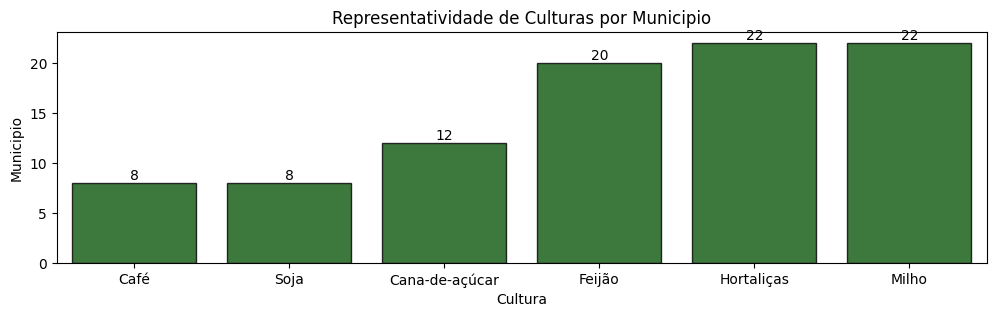

In [ ]:
graph_participacao_cultura_municipio = df.groupby('Cultura')['Municipio'].nunique().reset_index().sort_values(by='Municipio',ascending=True)

fig, ax1 = plt.subplots(figsize=(12,3))

# Plot gráfico barra de pedidos
graph_bar = sns.barplot(data = graph_participacao_cultura_municipio, x ='Cultura', y = 'Municipio', alpha=0.8, color='darkgreen', edgecolor='black')

# Datalabel em pedidos
for i in ax1.containers:
    ax1.bar_label(i,)

plt.title('Representatividade de Culturas por Municipio');

In [ ]:
df.groupby('Regiao')['Municipio'].unique()

Regiao
Centro Ociental                                                   [Ubiratã]
Centro Oriental           [Castro, Jaguariaíva, Piraí do Sul, Telêmaco B...
Centro-sul Paranaense     [Boa Ventura de São Roque, Candói, Cantagalo, ...
Curitiba Metropolitana    [Agudos do Sul, Almirante Tamandaré, Araucária...
Norte Central             [Ariranha do Ivaí, Bom Sucesso, Floresta, Itam...
Norte Pioneiro            [Jaboti, Pinhalão, Quatiguá, Salto do Itararé,...
Oeste Paranaense          [Iguatu, Maripá, Nova Santa Rosa, São José das...
Sudeste Paranaense        [General Carneiro, Porto Vitória, São João do ...
Sudoeste Paranaense       [Barracão, Bom Sucesso do Sul, Chopinzinho, Co...
Name: Municipio, dtype: object

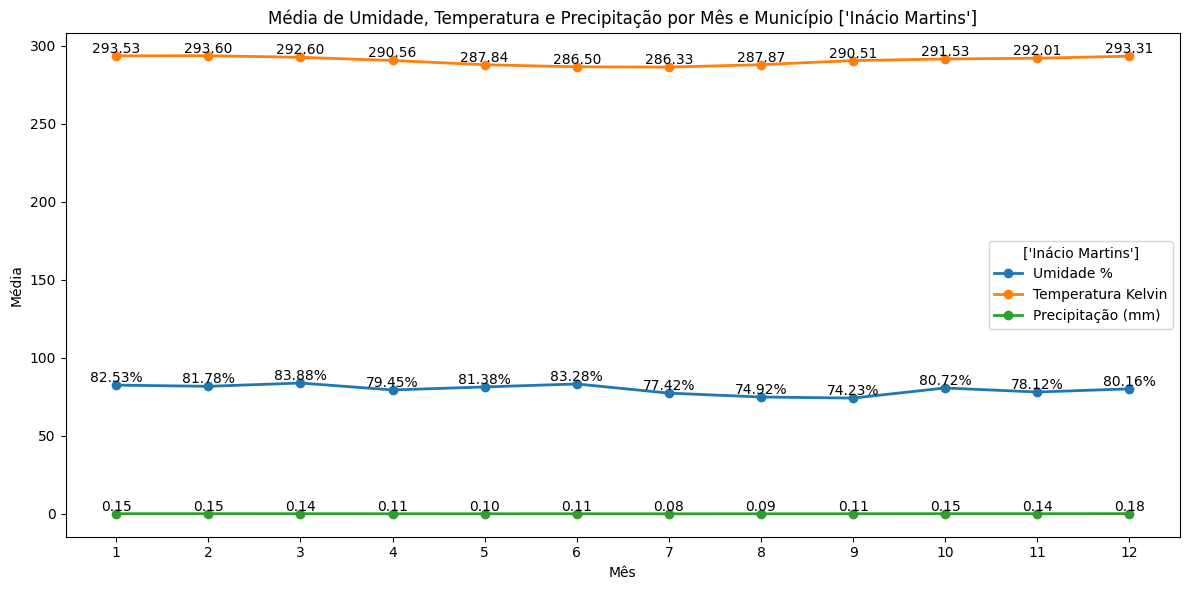

In [ ]:
sample_municipio = df.sample()['Municipio'].unique()
graph_dispersion =df[df['Municipio'].isin(sample_municipio)]
municipio = graph_dispersion['Municipio'].unique()

plt.figure(figsize=(12, 6))

plt.plot(graph_dispersion['Mes'], graph_dispersion['Umidade Media %'], marker='o', label='Umidade %', linewidth=2)
plt.plot(graph_dispersion['Mes'], graph_dispersion['Temperatura Media Kelvin'], marker='o', label='Temperatura Kelvin', linewidth=2)
plt.plot(graph_dispersion['Mes'], graph_dispersion['Preciptacao Media hPa'], marker='o', label='Precipitação (mm)', linewidth=2)

# Adicione rótulos de dados
for i, umidade in enumerate(graph_dispersion['Umidade Media %']):
    plt.text(i+1, umidade, f'{umidade:.2f}%', ha='center', va='bottom', fontsize=10)

for i, temperatura in enumerate(graph_dispersion['Temperatura Media Kelvin']):
    plt.text(i+1, temperatura, f'{temperatura:.2f}', ha='center', va='bottom', fontsize=10)

for i, precipitacao in enumerate(graph_dispersion['Preciptacao Media hPa']):
    plt.text(i+1, precipitacao, f'{precipitacao:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(graph_dispersion['Mes'])
plt.xlabel('Mês')
plt.ylabel('Média')
plt.title(f'Média de Umidade, Temperatura e Precipitação por Mês e Município {municipio}')

plt.legend(title=f'{municipio}')
plt.tight_layout()
plt.show()

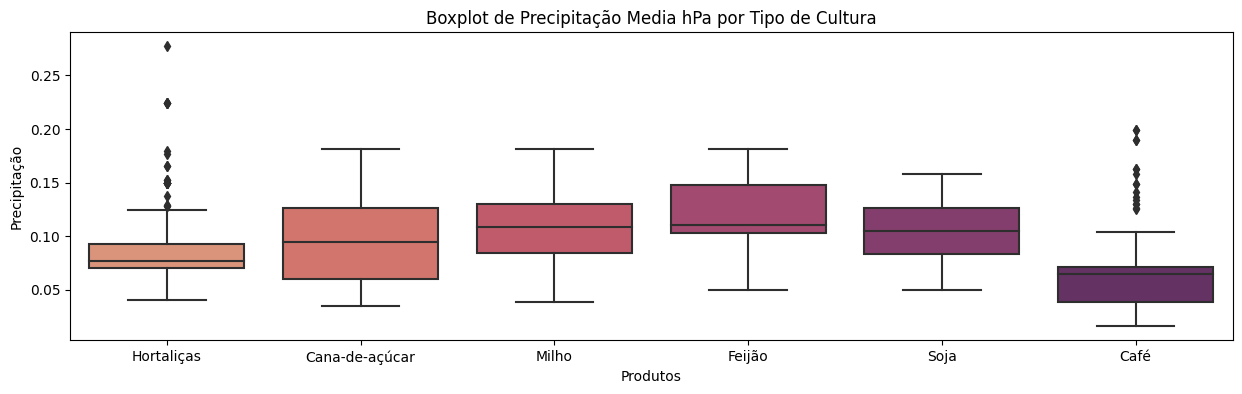

In [ ]:
# Define tamanho de área do gráfico
plt.figure(figsize=(15,4))

# Cria gráfico
g = sns.boxplot(x="Cultura", y="Preciptacao Media hPa", data=df,palette='flare');

# Define título
g.set_title('Boxplot de Precipitação Media hPa por Tipo de Cultura');

# Define eixos x e y
g.set_xlabel('Produtos')
g.set_ylabel('Precipitação');

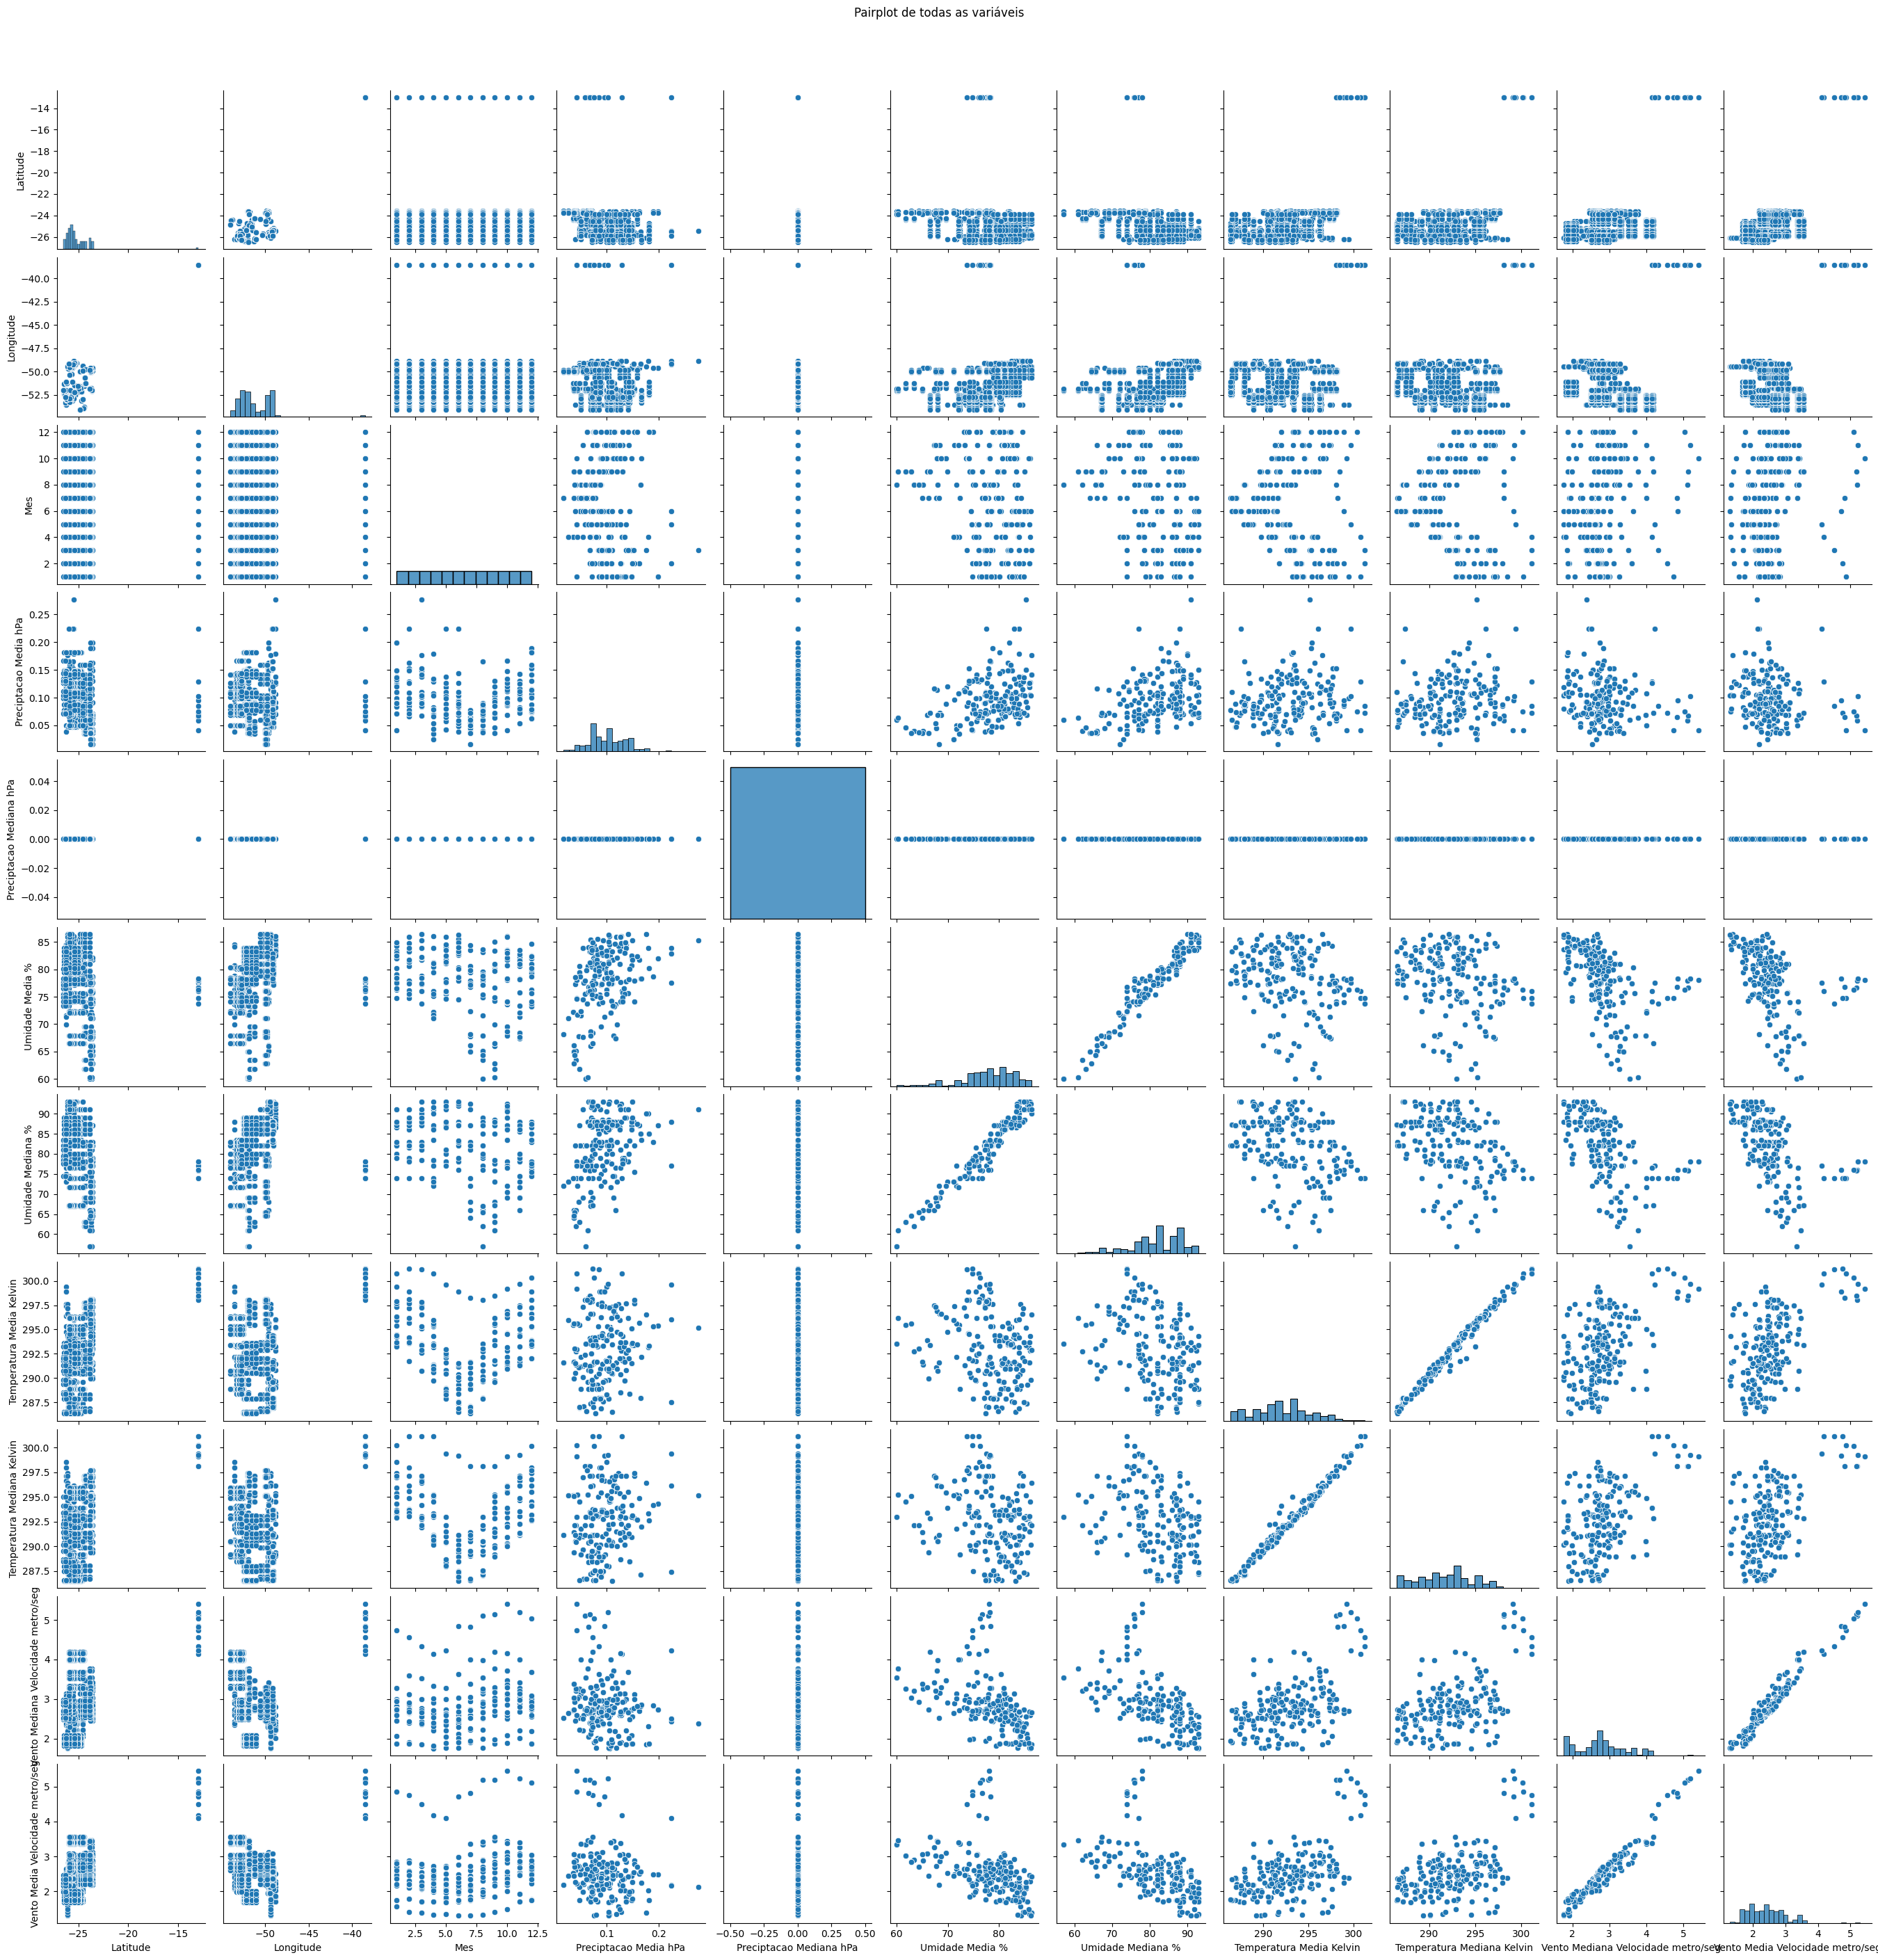

In [ ]:
graph_rel_features = sns.pairplot(df)

graph_rel_features.fig.suptitle('Pairplot de todas as variáveis', x=0.5, y=1.03);

**Conclusão:** O dataframe possui certa correlação entre os dados, devido a localização e características de solo/clima que definem cada região do estado do Paraná. Foi possível ver que as culturas de Café/Soja tem uma participação baixa em relação as demais culturas do estado e também foi possível ver quais colunas devem ser desconsideradas para o modelo, por exemplo: Coluna Preciptacao Mediana hPa que possui um único valor, como é possível ver no gráfico pairplot.

# Início de Feature Engineering

## Transformando dados categóricos de solo em números

In [ ]:
valores_unicos_solo = pd.concat([df['Composicao do solo - 1'], df['Composicao do solo - 2'], df['Composicao do solo - 3'],
                                df['Composicao do solo - 4'], df['Composicao do solo - 5'], df['Composicao do solo - 5'],
                                df['Composicao do solo - 6'], df['Cultura']])

valores_unicos_solo = pd.unique(valores_unicos_solo)

In [ ]:
dict_solo_to_number = {value: i+1 for i, value in enumerate(valores_unicos_solo)}

In [ ]:
df.replace(dict_solo_to_number, inplace = True)

In [ ]:
df.drop(columns=['Composicao do solo (ordem) - 1','Composicao do solo (ordem) - 2',
                 'Composicao do solo (ordem) - 3','Composicao do solo (ordem) - 4',
                 'Composicao do solo (ordem) - 5','Composicao do solo (ordem) - 6',
                 'Preciptacao Mediana hPa','Estado','Municipio','Regiao'], inplace=True)

In [ ]:
df = df.reset_index().drop(columns='index')

## Cria colunas auxiliares de Solo/Clima

In [ ]:
# Coluna auxiliar de solo
df['Aux solo'] = df[['Composicao do solo - 1','Composicao do solo - 2',	'Composicao do solo - 3',	'Composicao do solo - 4',
                     'Composicao do solo - 5','Composicao do solo - 6','Cultura']].mean(axis=1)

# Coluna auxiliar de clima
df['Aux clima'] = df[['Preciptacao Media hPa','Umidade Media %','Temperatura Media Kelvin','Vento Media Velocidade metro/seg']].mean(axis=1)

## Algoritmo Kmeans - Clusterização para criar labels

In [ ]:
df1 = df[['Aux clima','Aux solo']]

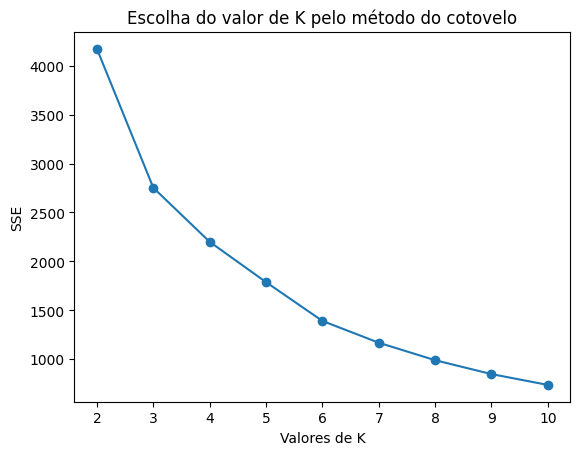

In [ ]:
erros = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df1)
  erros.append( kmeans.inertia_ )

plt.plot(list( range(2, 11) ), erros, "-o")
plt.xlabel("Valores de K")
plt.ylabel("SSE")
plt.title("Escolha do valor de K pelo método do cotovelo")
plt.show()

**Conclusão:** O número de clusters ideal é 6.

In [ ]:
# Inicializa o algoritmo
km = KMeans(n_clusters=6, random_state=42)

# Cria os clusteres
km.fit(df1)

# Obtém os centroids
centroids = km.cluster_centers_

# Obtém a clusterização de cada dado
km_labels = km.predict(df1)

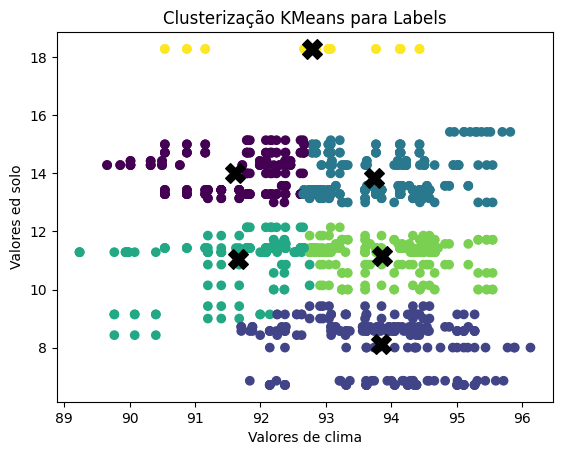

In [ ]:
# Plotando o resultado

# -> clusteres
plt.scatter(df1["Aux clima"],         # Eixo X
            df1["Aux solo"],          # Eixo Y
            c=km_labels)              # Esquema de cores (1 cor para cada cluster)

# -> centroids
plt.scatter(centroids[:, 0],          # Eixo X
            centroids[:, 1],          # Eixo Y
            c="black",                # Todos os centroids serão pretos
            marker="X",               # Tipo de marcador como um "X"
            s=200);                   # Tamanho do marcador

plt.xlabel("Valores de clima")
plt.ylabel("Valores ed solo")
plt.title('Clusterização KMeans para Labels')
plt.show()

**Conclusão:** A partir do retorno do Kmeans, podemos ver como estão distribuídas as 6 labels criadas na relação de dados Clima x Solo. Essas labels que vamos considerar como grupos de máquinas que serão recomendadas ao usuário.

In [ ]:
df['Equipamento'] = km.labels_

label_dict = {0: 'Trator', 1: 'Carregador Frontal', 2: 'Preparo de Solo', 3: 'Plantio',
                4: 'Trato Cultural', 5: 'Colheita'}

df['Equipamento'] = df['Equipamento'].replace(label_dict)

Labels renomeadas, dessa forma conseguimos a versão final do dataframe para o modelo.

In [ ]:
# Base final
df.sample(10)

,Latitude,Longitude,Mes,Preciptacao Media hPa,Umidade Media %,Umidade Mediana %,Temperatura Media Kelvin,Temperatura Mediana Kelvin,Vento Mediana Velocidade metro/seg,Vento Media Velocidade metro/seg,Composicao do solo - 1,Composicao do solo - 2,Composicao do solo - 3,Composicao do solo - 4,Composicao do solo - 5,Composicao do solo - 6,Cultura,Aux solo,Aux clima,Equipamento
804,-24.319340,-51.313967,1,0.109677,77.462903,83.00,297.343871,296.990,2.750,2.600000,1,3,7,4,10,12,27,9.142857,94.379113,Carregador Frontal
985,-24.328294,-50.631802,2,0.126207,85.934138,91.00,293.670000,293.020,2.680,2.461034,3,19,14,1,17,7,30,13.000000,95.547845,Preparo de Solo
48,-25.584223,-49.631274,1,0.090645,82.984194,88.00,294.469355,293.650,2.730,2.478710,3,9,7,9,3,7,26,9.142857,95.005726,Carregador Frontal
882,-25.682971,-50.294920,7,0.060000,79.869355,82.00,286.544839,286.690,2.710,2.333548,2,13,9,3,9,7,27,10.000000,92.201935,Plantio
248,-25.980377,-52.565428,9,0.130333,74.871333,78.50,291.817333,291.405,2.700,2.160333,4,10,12,5,14,20,28,13.285714,92.244833,Trator
536,-24.419978,-53.828641,9,0.072667,66.473333,67.25,293.401333,292.855,4.185,3.552000,12,16,21,12,16,21,30,18.285714,90.874833,Colheita
716,-24.759586,-51.763758,9,0.108667,74.235000,77.50,290.510000,290.070,1.985,1.846000,5,14,20,4,10,12,29,13.428571,91.674917,Trator
909,-24.835086,-54.062149,10,0.126129,74.111613,76.50,294.525806,293.870,4.150,3.387097,4,10,12,12,16,21,30,15.000000,93.037661,Preparo de Solo
297,-24.566171,-49.420301,10,0.086774,83.471613,91.00,290.920323,290.150,2.500,2.179355,3,1,19,1,23,3,26,10.857143,94.164516,Trato Cultural
991,-24.328294,-50.631802,8,0.076774,78.856129,80.00,287.882258,287.510,2.900,2.646774,3,19,14,1,17,7,30,13.000000,92.365484,Trator


## Separação de bases

In [ ]:
# Separando base de features e labels
X = df.drop(columns=['Aux clima','Aux solo','Equipamento'])
y = df['Equipamento']

In [ ]:
# Separando bases de treino e teste em 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.2,
                                                    random_state=42)

## Padronização de features

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Observando features de treino padronizadas
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.167829,-0.241626,0.204061,-0.624399,-0.162527,-0.040344,-1.890821,-1.795671,-1.206139,-1.111132,1.073669,-1.595678,0.482701,-0.375501,0.572786,1.644101,0.521370
1,-0.493462,0.327645,1.305740,0.630686,0.581384,0.569143,-0.058942,-0.195208,0.716809,1.269083,-0.642953,0.380950,-0.414210,-0.655535,-0.251906,-0.375714,-0.673436
2,-0.263586,0.947637,0.754900,-0.222012,0.571764,0.873886,-0.848990,-1.005442,0.781994,0.924829,-0.642953,0.380950,-0.414210,-0.235484,-1.571414,-0.997195,-1.270839
3,1.094138,0.573813,-0.622198,-2.006524,-1.480923,-1.411689,1.217007,1.071825,-0.065407,0.152769,-0.986278,1.171601,-0.772974,-0.515518,0.902663,2.420952,1.716175
4,0.963215,0.725042,-0.897618,1.238662,0.803619,0.721514,0.946989,0.755067,0.064962,0.154593,-0.986278,1.171601,-0.772974,2.284827,1.397479,-1.307936,1.716175


# Modelo 01 - DecisionTree

In [ ]:
# Algoritmo de Arvore de Decisão
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth=6,
    min_samples_split=50,
    min_samples_leaf=5,
    random_state = 42
)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [ ]:
y_train_tree_pred = tree.predict(X_train)

acc_tree_train = round((accuracy_score(y_train,y_train_tree_pred)*100),2)
print(f'Acurácia TREINO: {acc_tree_train:.2f}%')

acc_tree_test = round((accuracy_score(y_test,y_pred_tree)*100),2)
print(f'Acurácia TESTE: {acc_tree_test:.2f}%')

Acurácia TREINO: 72.27%
Acurácia TESTE: 56.67%


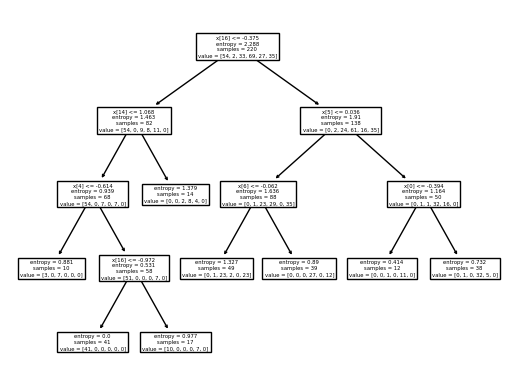

In [ ]:
plot_tree(tree);

**Conclusão:** A partir da análise da acurácia da árvore de decisão, conseguimos ver que esse não é o melhor resultados que podemos obter, sendo possível uma análise futura nos hiperparâmetros para o que melhor se adequa ao problema.

# Modelo 02 - RandomForest

In [ ]:
floresta = RandomForestClassifier(n_estimators=10)
floresta.fit(X_train, y_train)
y_pred_floresta = floresta.predict(X_test)

In [ ]:
y_train_floresta_pred = floresta.predict(X_train)

acc_forest_train = round((accuracy_score(y_train, y_train_floresta_pred)*100),2)
print(f'Acurácia TREINO Floresta: {acc_forest_train:.2f}%')

acc_forest_test = round((accuracy_score(y_test, y_pred_floresta)*100),2)
print(f'Acurácia TESTE Floresta: {acc_forest_test:.2f}%')

Acurácia TREINO Floresta: 99.09%
Acurácia TESTE Floresta: 81.33%


**Conclusão:** Obtivemos uma acurácia quase que perfeita para um modelo que pode se adaptar a dados reais. Com uma queda na adaptação aos dados de teste que é algo normal de acontecer.

# Modelo 03 - KNN

In [ ]:
# Definindo número de K vizinhos mais próximos
print(f' Número de vizinhos mais próximos: {round(math.sqrt(len(y_test)),2)}. \n Como não queremos empate em uma votação entre os vizinhos, o número será arredondado para 29.')

 Número de vizinhos mais próximos: 29.73. 
 Como não queremos empate em uma votação entre os vizinhos, o número será arredondado para 29.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=29, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

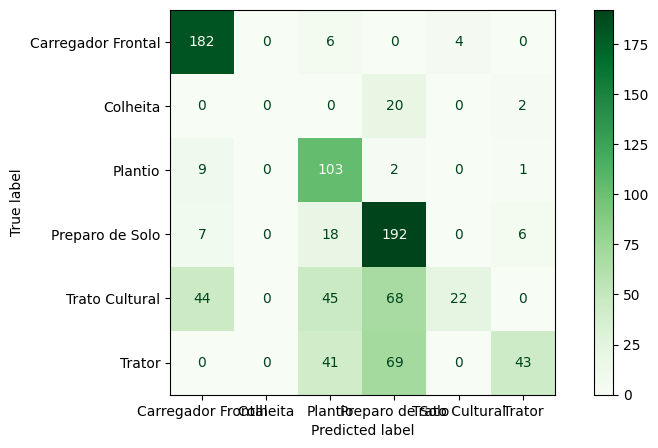

In [ ]:
y_train_knn_pred = knn.predict(X_train)

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=knn.classes_)

fig, ax = plt.subplots(figsize=(10,5))
disp.plot(ax=ax, cmap='Greens')

In [ ]:
acc_knn_train = round((accuracy_score(y_train, y_train_knn_pred)*100),2)
f1_knn_train = round((f1_score(y_train,y_train_knn_pred, average='micro')*100),2)
print(f'Acurácia TREINO KNN: {acc_knn_train:.2f}%')
print(f'F1 TREINO KNN: {f1_knn_train:.2f}%\n')

acc_knn_test = round((accuracy_score(y_test, y_pred_knn)*100),2)
f1_knn_test = round((f1_score(y_test,y_pred_knn, average='micro')*100),2)
print(f'Acurácia TESTE KNN: {acc_knn_test:.2f}%')
print(f'F1 TESTE KNN: {f1_knn_test:.2f}%')

Acurácia TREINO KNN: 72.73%
F1 TREINO KNN: 72.73%

Acurácia TESTE KNN: 61.31%
F1 TESTE KNN: 61.31%


**Conclusão:** Para a análise das métricas do KNN, combinamos as métricas de Acurácia, F1-score e a matriz de confusão, com resultados relativamente bons mas podemos observar que o modelo se perdeu bastante em encontrar o padrão da label.

# Modelo 04 - Perceptron

In [ ]:
perceptron = Perceptron(
    max_iter=1000,
    random_state = 42,
    eta0=0.1
)

perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

In [ ]:
y_train_perceptron_pred = perceptron.predict(X_train)

f1_train_perceptron = f1_score(y_train,y_train_perceptron_pred, average='micro')
f1_test_perceptron = f1_score(y_test,y_pred_perceptron, average='micro')

acc_perceptron_train = round((accuracy_score(y_train,y_train_perceptron_pred)*100),2)
acc_perceptron_test = round((accuracy_score(y_test,y_pred_perceptron)*100),2)

print(f'Acurácia TREINO Perceptron: {acc_perceptron_train:.2f}%')
print(f'F1 TREINO Perceptron: {round(f1_train_perceptron,2)}\n')

print(f'Acurácia TESTE Perceptron: {acc_perceptron_test:.2f}%')
print(f'F1 TESTE Perceptron: {round(f1_test_perceptron,2)}')

Acurácia TREINO Perceptron: 83.18%
F1 TREINO Perceptron: 0.83

Acurácia TESTE Perceptron: 69.12%
F1 TESTE Perceptron: 0.69


**Conclusão:** Um modelo de redes bastante utilizado para problemas simples de classificação é o Perceptron, obtivemos bons valores de acordo com as métricas de acurácia e f1-score.

# Modelo 05 - MLP

Seguindo a sugestão de Jeff Heaton, o número de neurônios escondidos deve ser 2/3 do tamanho da camada de entrada, mais o tamanho da camada de saída.

Assim, a camada escondida no nosso exemplo deve conter:

**(17*2/3)+6 = 17 neurônios** para a primeira camada.

**(17*2/3)+6 = 17 neurônios** para a segunda camada.

In [ ]:
mlp2 = MLPClassifier(
    hidden_layer_sizes=(17,17),
    max_iter=1000,
    random_state = 42,
    activation='relu',
    solver='lbfgs',
    learning_rate='adaptive'
)

mlp2.fit(X_train, y_train)
y_pred_mlp2 = mlp2.predict(X_test)

Acurácia TREINO MLP 2: 100.00%
F1 TREINO MLP 2: 1.0
Precisão TREINO MLP 2: 1.0

Acurácia TESTE MLP 2: 89.14%
F1 TESTE MLP 2: 0.89
Precisão TESTE MLP 2: 0.89


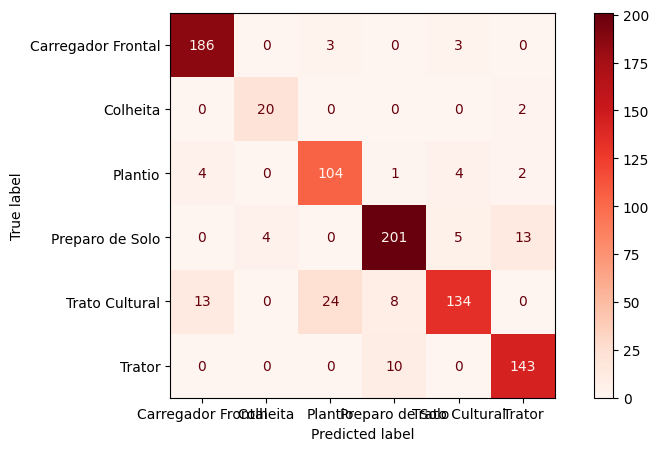

In [ ]:
y_train_mlp2_pred = mlp2.predict(X_train)

acc_mlp_train = round((accuracy_score(y_train,y_train_mlp2_pred)*100),2)
f1_train_mlp2 = f1_score(y_train,y_train_mlp2_pred, average='micro')
precis_train_mlp2 = precision_score(y_train,y_train_mlp2_pred, average='micro')

acc_mlp_test = round((accuracy_score(y_test,y_pred_mlp2)*100),2)
f1_test_mlp2 = f1_score(y_test,y_pred_mlp2, average='micro')
precis_test_mlp2 = precision_score(y_test,y_pred_mlp2, average='micro')


print(f'Acurácia TREINO MLP 2: {acc_mlp_train:.2f}%')
print(f'F1 TREINO MLP 2: {round(f1_train_mlp2,2)}')
print(f'Precisão TREINO MLP 2: {round(precis_train_mlp2,2)}\n')


print(f'Acurácia TESTE MLP 2: {acc_mlp_test:.2f}%')
print(f'F1 TESTE MLP 2: {round(f1_test_mlp2,2)}')
print(f'Precisão TESTE MLP 2: {round(precis_test_mlp2,2)}')

cm = confusion_matrix(y_test, y_pred_mlp2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=mlp2.classes_)

fig, ax = plt.subplots(figsize=(10,5))
disp.plot(ax=ax, cmap='Reds')

**Conclusão:** O modelo de classificação MLPClassifier baseado em redes neurais é uma ferramenta forte para a classificação do nosso problema relativamente simples, já que características de solo x clima podem ser abrangentes. Podemos ver os resultados bons por meio da matriz de confusão, acurácia, f1-score e precisão, onde o treinamento foi perfeito e a leve queda para os testes.

# Comparação entre modelos de classificação

In [ ]:
compara_modelos = pd.DataFrame({"Algoritmo":["DecisionTree","RandomForest","KNN","Perceptron","MLPClassifier"],
                                "Acuracia Treino":[acc_tree_train,acc_forest_train,acc_knn_train,acc_perceptron_train,acc_mlp_train],
                                "Acuracia Teste":[acc_tree_test,acc_forest_test,acc_knn_test,acc_perceptron_test,acc_mlp_test]})

In [ ]:
def highlight_row(row):
  if row.name in [1,4]:
    return ['background-color: mediumseagreen']*3
  else:
    return ['background-color: ']*3

compara_modelos.style.apply(highlight_row, axis=1)

,Algoritmo,Acuracia Treino,Acuracia Teste
0,DecisionTree,72.270000,56.670000
1,RandomForest,99.090000,81.330000
2,KNN,72.730000,61.310000
3,Perceptron,83.180000,69.120000
4,MLPClassifier,100.000000,89.140000


**Conclusão:** Após comparação entre os 5 modelos testados, decidimos seguir com o RandomForest para a classificação dos grupos de máquinas indicados para o terreno/clima da fazenda do usuário e assim, recomendar de forma assertiva ao cliente.

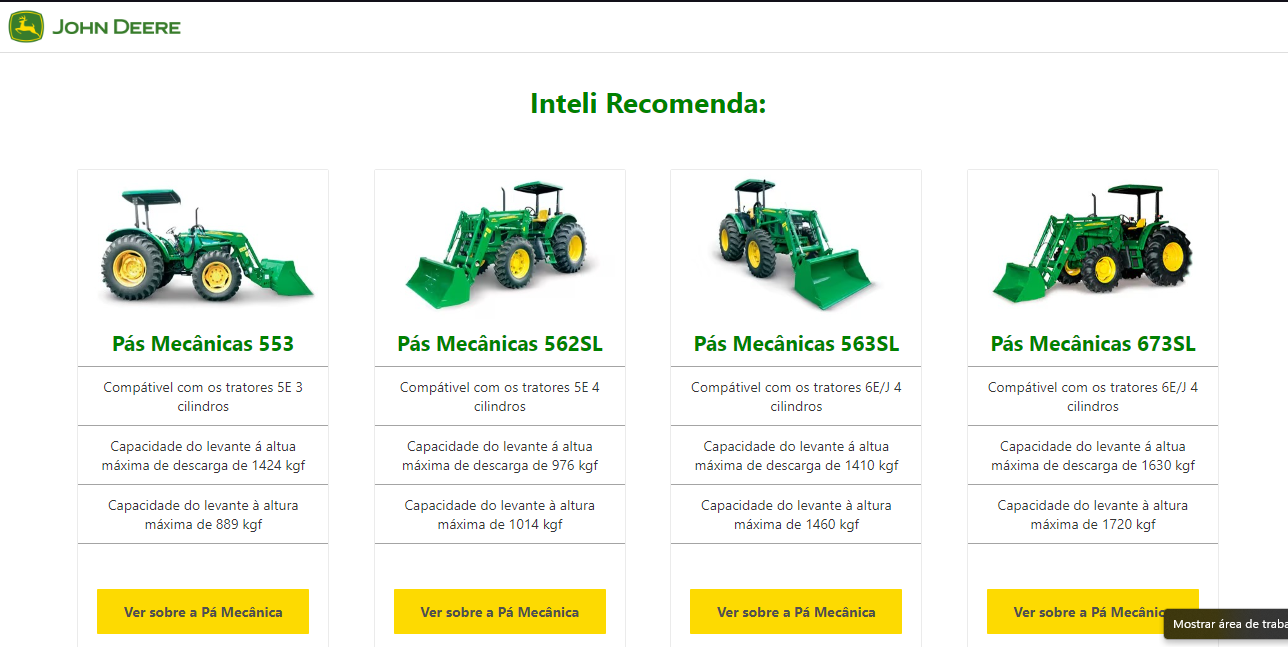